# Analyzing Mars 2020 MEDA Data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import mode

from muldoon.met_timeseries import MetTimeseries
from muldoon.utils import *
from muldoon.read_data import *

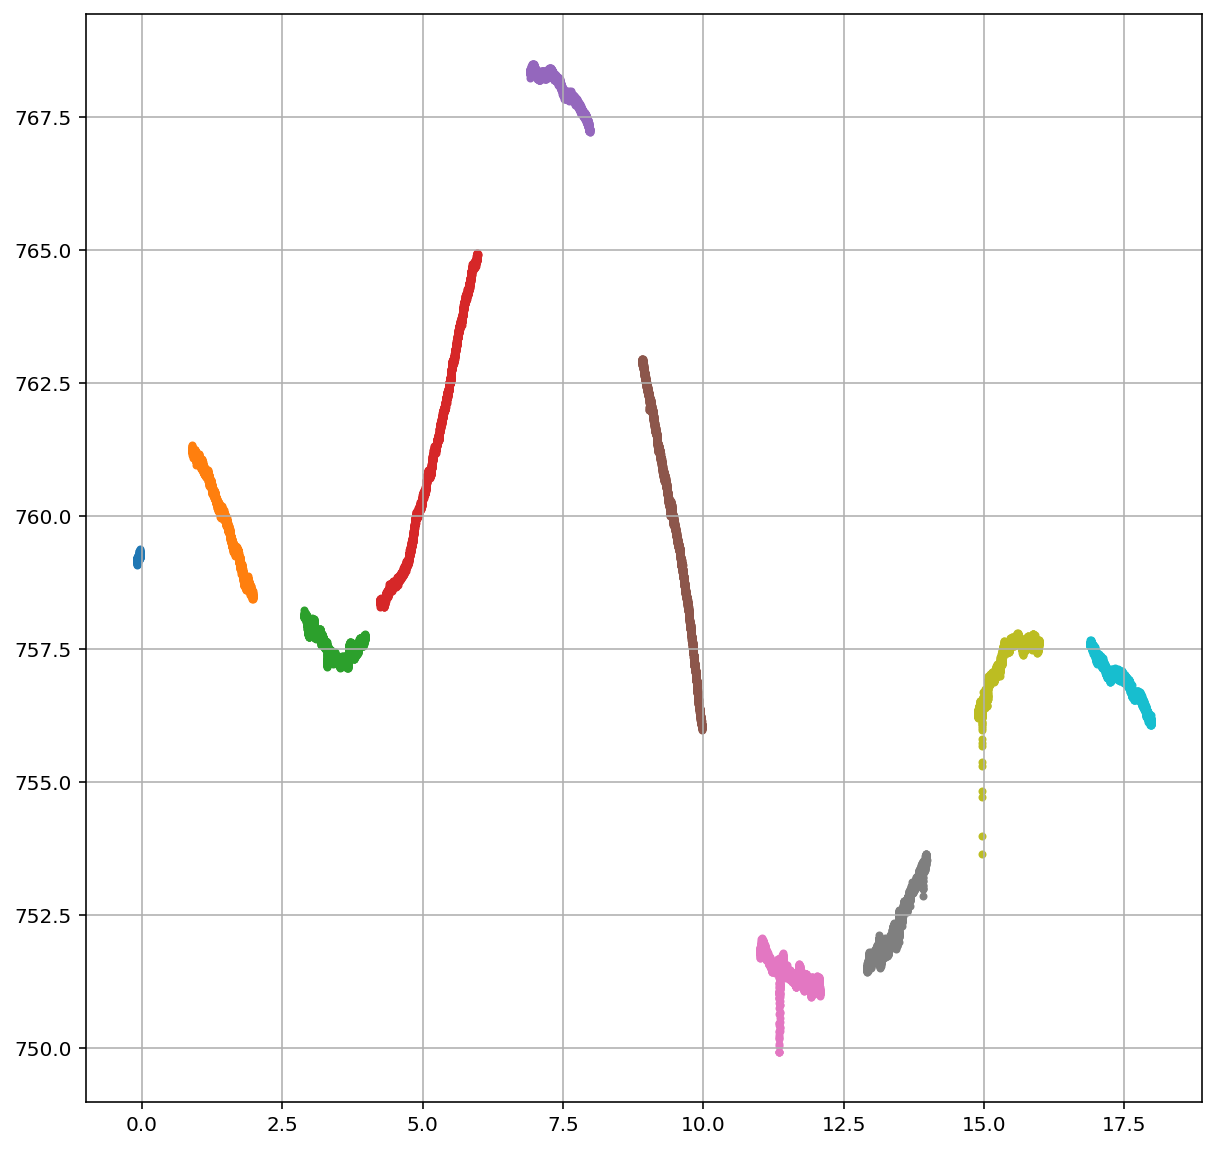

In [9]:
# Read in data file
filename = "./WE__0089___________DER_PS__________________P01.CSV"
time, pressure = read_Perseverance_MEDA_data(filename)
# plt.scatter(time, pressure)

times, pressures = break_at_gaps(time, pressure)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for i in range(len(times)):
#     plt.axvline(time[0:-1][gaps][i])
    ax.scatter(times[i], pressures[i], marker='.')
ax.grid(True)

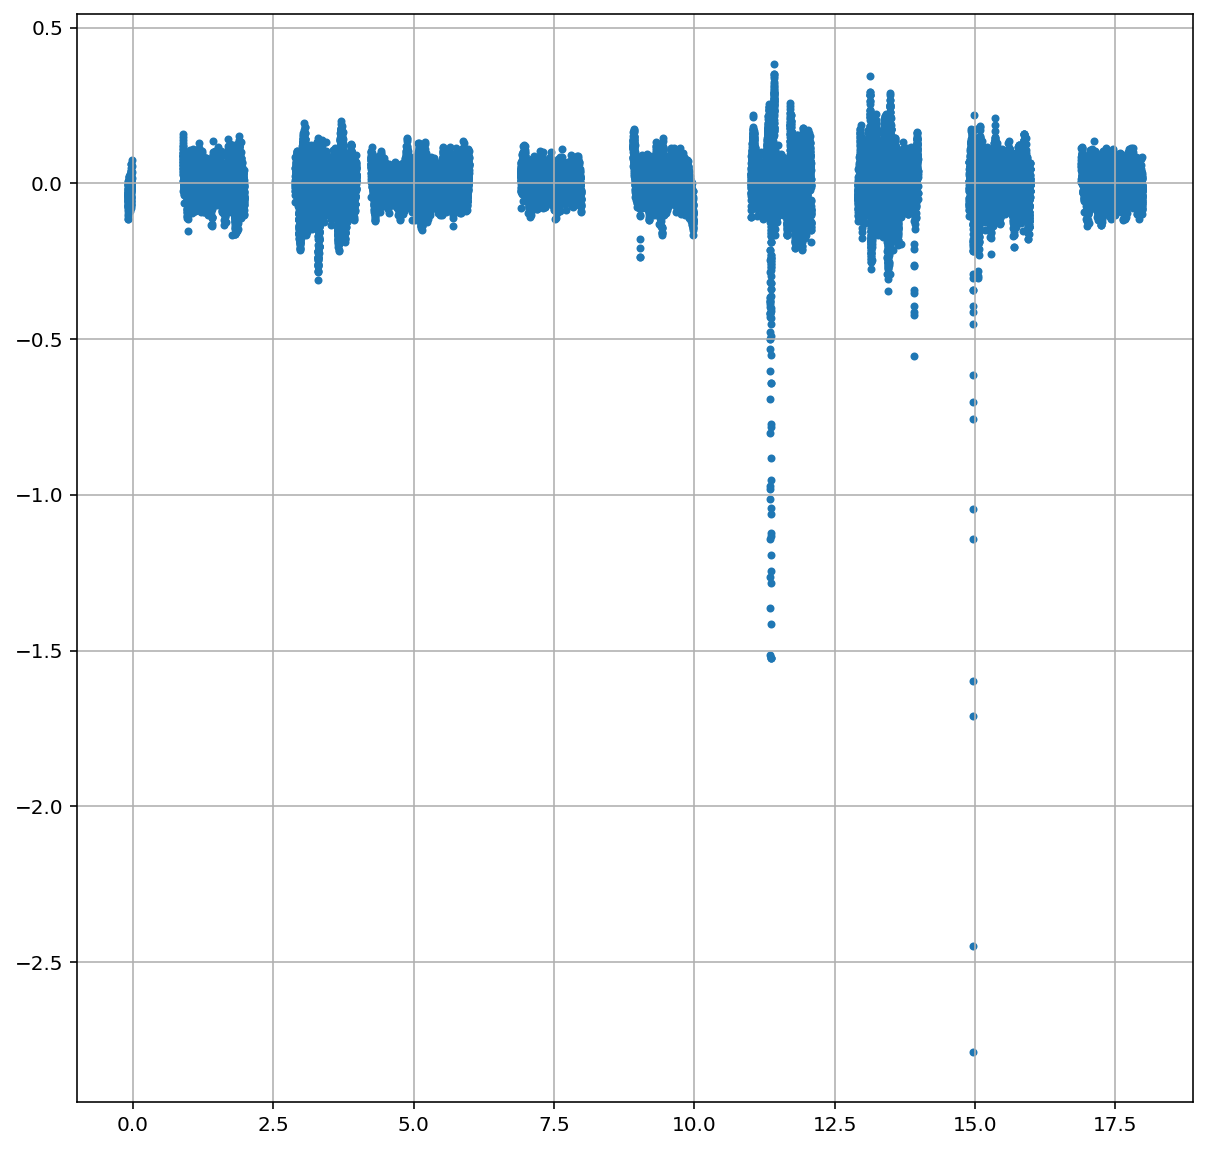

In [11]:
# Detrend

mt = MetTimeseries(time, pressure)

window_size = 500./3600 # window size is 500 seconds
mt.detrend_pressure_timeseries(window_size)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(mt.time, mt.detrended_pressure, marker='.')
ax.grid(True)

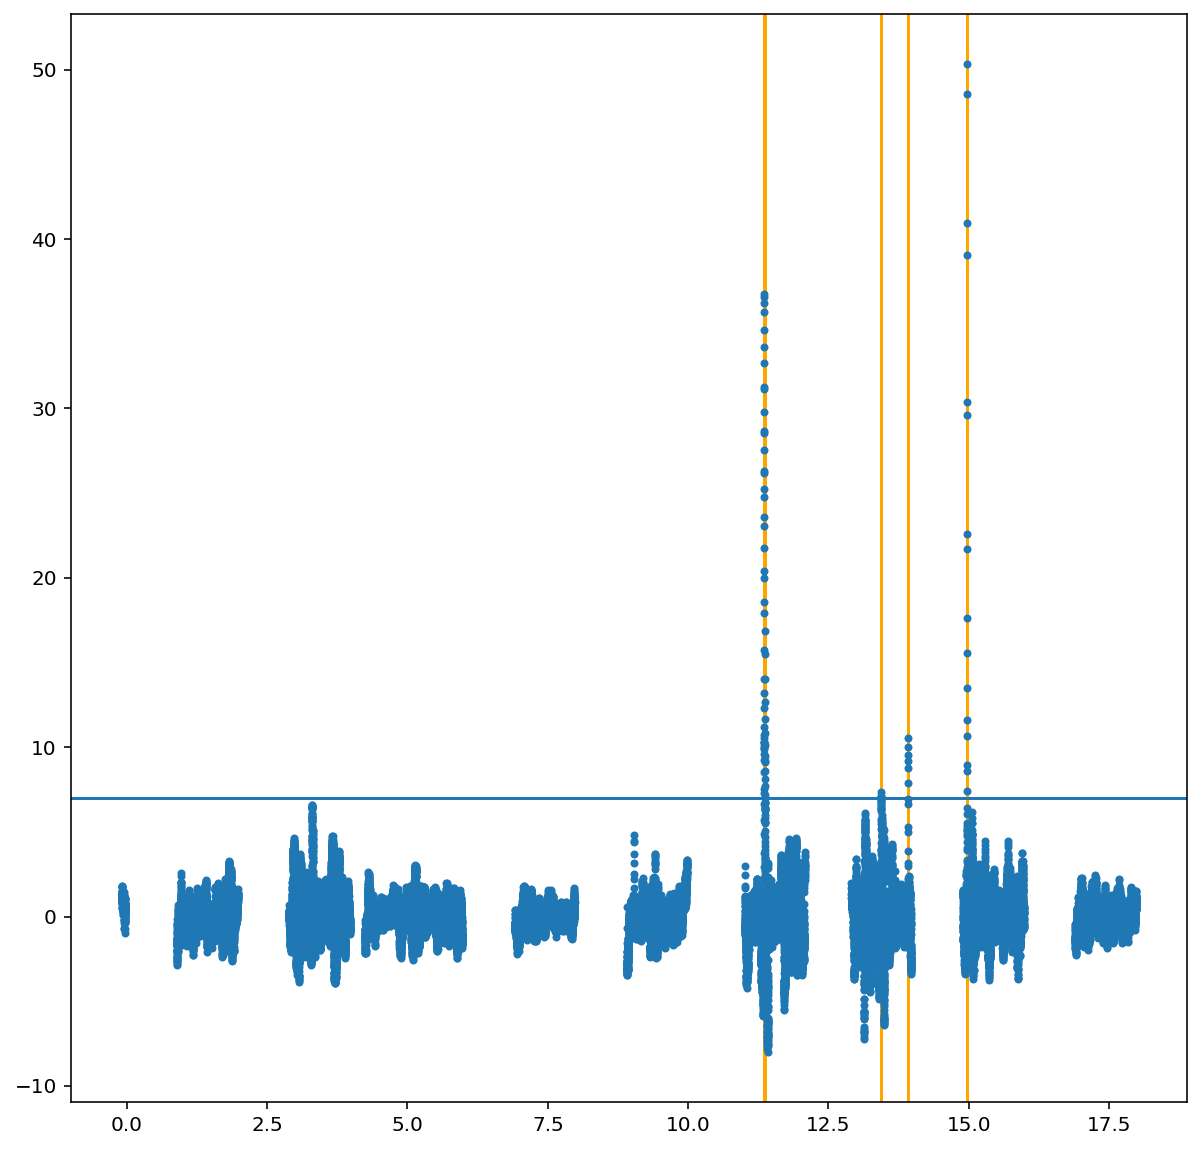

In [23]:
# Detect vortex signals
conv = mt.apply_lorentzian_matched_filter(2.*mt.sampling, 1./np.pi)
vortices = mt.find_vortices(detection_threshold=7.)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(mt.time, mt.convolution, ls='', marker='.')
ax.axhline(7.)

for i in range(len(mt.peak_indices)):
    ax.axvline(mt.time[mt.peak_indices[i]], color="orange", zorder=-1)

In [26]:
# Fit vortices
print(mt.vortices)

popts, uncs = mt.fit_all_vortices()

[{'time': array([14.96111111, 14.96138889, 14.96166667, 14.96194444, 14.96222222,
       14.9625    , 14.96277778, 14.96305556, 14.96333333, 14.96361111,
       14.96388889, 14.96416667, 14.96444444, 14.96472222, 14.965     ,
       14.96527778, 14.96555556, 14.96583333, 14.96611111, 14.96638889,
       14.96666667, 14.96694444, 14.96722222, 14.9675    , 14.96777778,
       14.96805556, 14.96833333, 14.96861111, 14.96888889, 14.96916667,
       14.96944444, 14.96972222, 14.96972222, 14.97      , 14.97027778,
       14.97055556]), 'pressure': array([756.24, 756.22, 756.24, 756.21, 756.24, 756.21, 756.23, 756.25,
       756.14, 756.09, 756.09, 756.02, 755.82, 755.68, 755.39, 754.84,
       753.99, 753.65, 754.73, 755.3 , 755.74, 755.99, 756.05, 756.14,
       756.23, 756.25, 756.3 , 756.32, 756.36, 756.4 , 756.36, 756.4 ,
       756.42, 756.38, 756.49, 756.49]), 'pressure_scatter': array([0.07192787, 0.07192787, 0.07192787, 0.07192787, 0.07192787,
       0.07192787, 0.07192787, 0.0719278

TypeError: expected non-empty vector for x